In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Load data

In [9]:
from utils.preprocessing import preprocess, split
datasetname = "JSB_Chorales"
datapath = "../data/"+datasetname+'/'
dataset, sizes, dictionaries = preprocess(datapath)
k_folds = 5
splitted = split(dataset, k_folds)

Processing 1
Processing 10
Processing 100
Processing 101
Processing 102
Processing 103
Processing 104
Processing 105
Processing 106
Processing 107
Processing 108
Processing 109
Processing 11
Processing 110
Processing 111
Processing 112
Processing 113
Processing 114
Processing 115
Processing 116
Processing 117
Processing 118
Processing 119
Processing 12
Processing 120
Processing 122
Processing 123
Processing 124
Processing 125
Processing 126
Processing 127
Processing 128
Processing 129
Processing 13
Processing 130
Processing 131
Processing 132
Processing 134
Processing 135
Processing 136
Processing 137
Processing 138
Processing 139
Processing 14
Processing 140
Processing 141
Processing 142
Processing 143
Processing 144
Processing 145
Processing 146
Processing 147
Processing 148
Processing 149
Processing 15
Processing 150
Processing 151
Processing 152
Processing 153
Processing 154
Processing 155
Processing 156
Processing 157
Processing 158
Processing 159
Processing 16
Processing 160
Proc

In [37]:
motifs = [2,4,8,16,32]

# Comparisons auto-novelty

In [39]:
from utils.novelty import autonovelty, novelty

%time testVsTrain = novelty(splitted[0]["train"], splitted[0]["test"], motifs)
%time auto = autonovelty(dataset, motifs)

CPU times: user 8 s, sys: 197 ms, total: 8.19 s
Wall time: 8.93 s
CPU times: user 1min 31s, sys: 3.5 s, total: 1min 35s
Wall time: 1min 58s


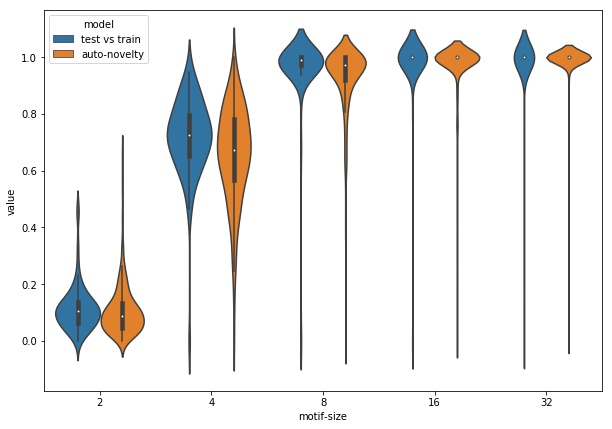

In [19]:
df = pd.DataFrame({'value': testVsTrain.ravel(), 'motif-size': motifs*testVsTrain.shape[0], 'model': "test vs train"})
df2 = pd.DataFrame({'value': auto.ravel(), 'motif-size': motifs*auto.shape[0], 'model': "auto-novelty"})
df = pd.concat([df, df2])

plt.subplots(figsize=(10, 7))
sns.violinplot(data=df, x="motif-size", y="value", hue="model")

# Analysis of 2 Fungram models

In [22]:
from models.fungram import FUNgram

fungram6 = FUNgram(6, sizes)
fungram12 = FUNgram(12, sizes)

%time _ = fungram6.train(dataset)
%time _ = fungram12.train(dataset)

CPU times: user 9.47 s, sys: 164 ms, total: 9.63 s
Wall time: 22.9 s
CPU times: user 26.3 s, sys: 718 ms, total: 27 s
Wall time: 59.1 s


In [23]:
N_songs = len(dataset["dTseqs"])
print(N_songs)

382


In [24]:
%time gen_fungram6 = fungram6.generate(n_songs = 20, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")
%time gen_fungram12 = fungram12.generate(n_songs = 20, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")

CPU times: user 626 ms, sys: 17.8 ms, total: 643 ms
Wall time: 3.65 s
CPU times: user 603 ms, sys: 17.1 ms, total: 620 ms
Wall time: 1.5 s


In [26]:
from utils.novelty import compute_sets, compare_to_sets

%time sets_ref_corpus = compute_sets(dataset, motifs)
%time novelty_fungram6 = compare_to_sets(gen_fungram6, motifs, sets_ref_corpus)
%time novelty_fungram12 = compare_to_sets(gen_fungram12, motifs, sets_ref_corpus)

CPU times: user 9.41 s, sys: 210 ms, total: 9.62 s
Wall time: 20.2 s
CPU times: user 727 ms, sys: 11.6 ms, total: 739 ms
Wall time: 1.76 s
CPU times: user 716 ms, sys: 10.3 ms, total: 727 ms
Wall time: 1.92 s


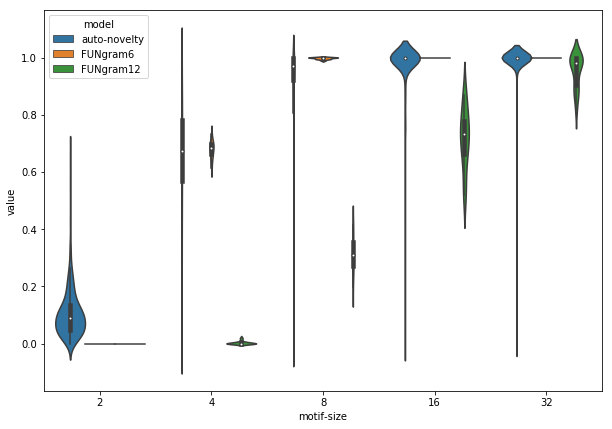

In [27]:
df = pd.DataFrame({'value': auto.ravel(), 'motif-size': motifs*auto.shape[0], 'model': "auto-novelty"})
df2 = pd.DataFrame({'value': novelty_fungram6.ravel(), 
                   'motif-size': motifs*novelty_fungram6.shape[0], 
                   'model': "FUNgram6"})
df3 = pd.DataFrame({'value': novelty_fungram12.ravel(), 
                   'motif-size': motifs*novelty_fungram12.shape[0], 
                   'model': "FUNgram12"})
df = pd.concat([df, df2, df3])

plt.subplots(figsize=(10, 7))
sns.violinplot(data=df, x="motif-size", y="value", hue="model")

Less original songs (at motif size 32):
Generated song 0, novelty 0.816568047337
This song is very similar to song 242 of the corpus: similarity [0.12426036]
longest common subsequence of length 52 written to disk
Generated song 4, novelty 0.85798816568
This song is very similar to song 8 of the corpus: similarity [0.10059172]
longest common subsequence of length 43 written to disk
Generated song 3, novelty 0.87573964497
This song is very similar to song 364 of the corpus: similarity [0.12426036]
longest common subsequence of length 52 written to disk
Generated song 12, novelty 0.887573964497
This song is very similar to song 282 of the corpus: similarity [0.11242604]
longest common subsequence of length 50 written to disk
Generated song 15, novelty 0.89349112426
This song is very similar to song 59 of the corpus: similarity [0.10650888]
longest common subsequence of length 42 written to disk
Most original songs at motif size 8:
Generated song 16 : novelty 0.414507772021
Generated song

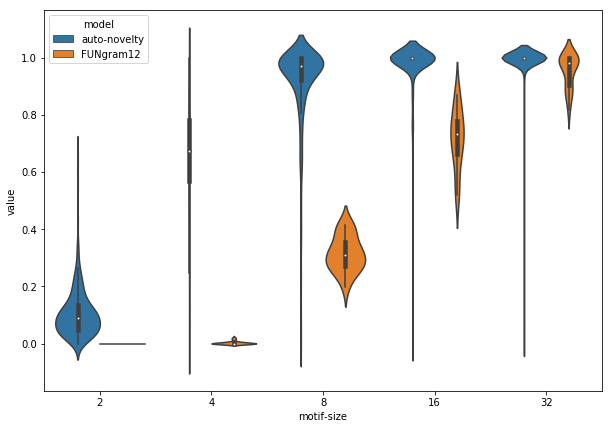

In [47]:
from utils.novelty import novelty_analysis

%time novelty_analysis(dataset, gen_fungram12, motifs, datapath+"gen/", "FUNgram12", auto, dictionaries)

# Model BachProp7

In [1]:
from keras.models import load_model

m = load_model("models/model.hdf5")

/Users/toroloco/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
/Users/toroloco/anaconda2/lib/python2.7/site-packages/keras/layers/recurrent.py:2073: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [2]:
m.input_shape

[(32, 192, 25), (32, 192, 25), (32, 192, 54)]

In [6]:
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (32, 192, 25)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (32, 192, 25)        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (32, 192, 54)        0                                            
__________________________________________________________________________________________________
masking_1 (Masking)             (32, 192, 25)        0           input_1[0][0]                    
__________________________________________________________________________________________________
masking_2 

In [32]:
import tqdm

def sample(preds, temperature=1.):
    if temperature == 0.:
        return np.argmax(preds)
    preds = np.asarray(preds).astype('float32')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def sampleNmax(preds, N=3):
    candidateidxes = np.argsort(preds)[-N:]
    prcandidates = preds[candidateidxes]
    return candidateidxes[sample(prcandidates)]

def generate(model, XdT_seed, XT_seed, XP_seed, maxlen, batchsize, T, sizes, sampling='sampleNmax'):
    XdT = np.zeros((batchsize, T, sizes[0]), dtype=int)
    XT = np.zeros((batchsize, T, sizes[1]), dtype=int)
    XP = np.zeros((batchsize, T, sizes[2]), dtype=int)
    
    XdT_hat = np.zeros((batchsize, maxlen+1, sizes[0]), dtype=int)
    XT_hat = np.zeros((batchsize, maxlen+1, sizes[1]), dtype=int)
    XP_hat = np.zeros((batchsize, maxlen+1, sizes[2]), dtype=int)
    
    # initialize generated sequences with provided seeds
    XdT_hat[:,0,:] = XdT_seed
    XT_hat[:,0,:] = XT_seed
    XP_hat[:,0,:] = XP_seed
    
    for t in xrange(maxlen):
        print "iteration: ",t
        # Initialize network input
        XdT[:,0,:] = XdT_hat[:,t,:]
        XT[:,0,:] = XT_hat[:,t,:]
        XP[:,0,:] = XP_hat[:,t,:]
        
        # predict dT
        probs, _, _ = model.predict([XdT, XT, XP])
        for idx in range(batchsize):
            if sampling == 'sampleNmax':
                choice = sampleNmax(probs[idx, 0], N=3)
            elif sampling == 'rand':
                choice = sample(probs[idx, 0])
            elif sampling == 'argmax':
                choice = np.argmax(probs[idx, 0])
            else:
                print("unknow sampling")
            XdT_hat[idx, t+1, choice] = 1.    
        XdT[:,0,:] = XdT_hat[:,t+1,:]
        
        # predict T
        _, probs, _ = model.predict([XdT, XT, XP])
        for idx in range(batchsize):
            if sampling == 'sampleNmax':
                choice = sampleNmax(probs[idx, 0], N=3)
            elif sampling == 'rand':
                choice = sample(probs[idx, 0])
            elif sampling == 'argmax':
                choice = np.argmax(probs[idx, 0])
            else:
                print("unknow sampling")
            XT_hat[idx, t+1, choice] = 1.
        XT[:,0,:] = XT_hat[:,t+1,:]
        
        # predict P
        _, _, probs = model.predict([XdT, XT, XP])
        for idx in range(batchsize):
            if sampling == 'sampleNmax':
                choice = sampleNmax(probs[idx, 0], N=3)
            elif sampling == 'rand':
                choice = sample(probs[idx, 0])
            elif sampling == 'argmax':
                choice = np.argmax(probs[idx, 0])
            else:
                print("unknow sampling")
            XP_hat[idx, t+1, choice] = 1.
    return [XdT_hat, XT_hat, XP_hat]
        

In [34]:
batchsize = 32
T = 192
maxlen = T

XdT_seed = np.zeros((batchsize, sizes[0]), dtype=int)
XT_seed = np.zeros((batchsize, sizes[1]), dtype=int)
XP_seed = np.zeros((batchsize, sizes[2]), dtype=int)

# Sample random seeds
XdT_seed[:,0] = 1.
rndm_idxes = np.random.choice(sizes[1], size=batchsize)
for idx, rnd in enumerate(rndm_idxes):
    XT_seed[idx,rnd] = 1.
rndm_idxes = np.random.choice(sizes[2], size=batchsize)
for idx, rnd in enumerate(rndm_idxes):
    XP_seed[idx,rnd] = 1.
    
XdT_hat, XT_hat, XP_hat = generate(m, XdT_seed, XT_seed, XP_seed, maxlen, batchsize, T, sizes)

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
itera

In [50]:
# Postprocessing: remove one-hot encoding
gen_songs = {"dTseqs": XdT_hat.argmax(axis=2), "tseqs": XT_hat.argmax(axis=2), "pitchseqs": XP_hat.argmax(axis=2)}

In [48]:
from utils.preprocessing import toMIDI
from utils.midiparser import writeMIDI

for i in range(XdT_hat.shape[0]):
    dtseq, tseq, pseq = toMIDI(gen_songs["dTseqs"][i], gen_songs["Tseqs"][i], gen_songs["pitchseqs"][i], dictionaries)
    writeMIDI(dtseq, tseq, pseq, path=datapath+'gen/', label="BachProp7-"+str(i))

Less original songs (at motif size 32):
Generated song 0, novelty 1.0
This song is very similar to song 0 of the corpus: similarity 0.0
longest common subsequence of length 1 written to disk
Generated song 29, novelty 1.0
This song is very similar to song 0 of the corpus: similarity 0.0
longest common subsequence of length 1 written to disk
Generated song 28, novelty 1.0
This song is very similar to song 0 of the corpus: similarity 0.0
longest common subsequence of length 2 written to disk
Generated song 27, novelty 1.0
This song is very similar to song 0 of the corpus: similarity 0.0
longest common subsequence of length 1 written to disk
Generated song 26, novelty 1.0
This song is very similar to song 0 of the corpus: similarity 0.0
longest common subsequence of length 2 written to disk
Most original songs at motif size 8:
Generated song 31 : novelty 1.0
Generated song 30 : novelty 1.0
Generated song 1 : novelty 1.0
Generated song 2 : novelty 1.0
Generated song 3 : novelty 1.0
Most or

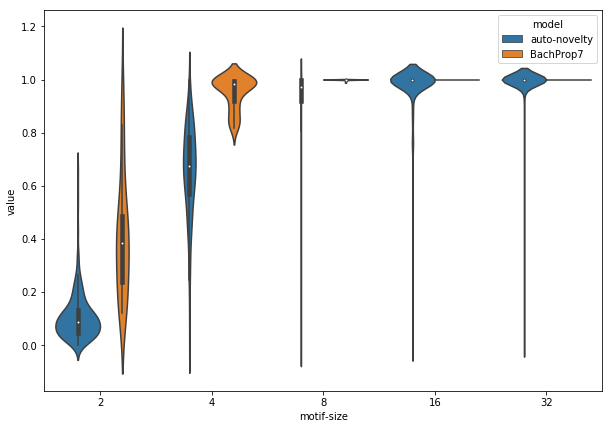

In [51]:
from utils.novelty import novelty_analysis

novelty_analysis(dataset, gen_songs, motifs, datapath+'gen/', 'BachProp7', auto, dictionaries)